# ***Diabetes Health Indicators Dataset***
Train On Different Classification Models and Find the Best Among Them

### Importing Libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

### Loading Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/7thSemester/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

Mounted at /content/drive


### Inspecting Data

In [13]:
df.shape

(70692, 22)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [15]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [16]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## Data Preprocessing

In [17]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [18]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Note:** Hence no null or NA values in the dataset

In [19]:
df_new = df.drop_duplicates()

In [20]:
len(df)-len(df_new)

1635

**Note:** 1635 rows discarded due to duplicates

In [21]:
df_new

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


### Understanding Data using Visualizations / EDA

In [22]:
df_new.corr().sort_values('Diabetes_binary')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Income,-0.212846,-0.176360,-0.098712,0.005067,-0.113706,-0.093897,-0.132637,-0.140702,0.186052,0.068603,...,0.127422,-0.193669,-0.370204,-0.212170,-0.271148,-0.335819,0.161566,-0.124261,0.450376,1.000000
Education,-0.158522,-0.130037,-0.075364,-0.011266,-0.089112,-0.130790,-0.069602,-0.090403,0.180159,0.089283,...,0.103564,-0.091678,-0.271037,-0.099237,-0.150105,-0.193869,0.042964,-0.101774,1.000000,0.450376
PhysActivity,-0.150281,-0.128307,-0.084469,-0.010072,-0.164179,-0.072401,-0.076771,-0.093858,1.000000,0.127578,...,0.024168,-0.059079,-0.264142,-0.124535,-0.228329,-0.270988,0.052069,-0.097456,0.180159,0.186052
HvyAlcoholConsump,-0.098709,-0.029764,-0.027259,-0.026850,-0.060795,0.076394,-0.024496,-0.038745,0.021624,-0.031518,...,-0.012691,0.008453,-0.063705,0.013914,-0.038739,-0.051894,0.015437,-0.059553,0.039971,0.068505
Veggies,-0.072181,-0.059824,-0.037801,-0.001040,-0.050163,-0.023760,-0.044869,-0.032327,0.143392,0.234505,...,0.026832,-0.033643,-0.106136,-0.047458,-0.060875,-0.078098,-0.053422,-0.015762,0.144755,0.146442
Fruits,-0.044560,-0.031818,-0.040783,0.015853,-0.076933,-0.068192,-0.005811,-0.014931,0.127578,1.000000,...,0.026964,-0.042215,-0.086836,-0.057019,-0.041836,-0.044017,-0.088017,0.066048,0.089283,0.068603
AnyHealthcare,0.027034,0.039659,0.034352,0.106549,-0.010527,-0.010228,0.007801,0.017603,0.024168,0.026964,...,1.000000,-0.220451,-0.028477,-0.047689,-0.000416,0.011066,-0.006804,0.139838,0.103564,0.127422
NoDocbcCost,0.036145,0.021802,0.029976,-0.061975,0.061861,0.031896,0.034305,0.033397,-0.059079,-0.042215,...,-0.220451,1.000000,0.164758,0.191108,0.153952,0.123415,-0.048469,-0.133527,-0.091678,-0.193669
Sex,0.042538,0.037824,0.013250,-0.008116,-0.002822,0.113422,0.004149,0.099020,0.052069,-0.088017,...,-0.006804,-0.048469,-0.016880,-0.089926,-0.045929,-0.082858,1.000000,-0.004755,0.042964,0.161566
Smoker,0.075853,0.078123,0.086522,-0.002854,0.002761,1.000000,0.061957,0.120457,-0.072401,-0.068192,...,-0.010228,0.031896,0.140658,0.086354,0.114730,0.113713,0.113422,0.099699,-0.130790,-0.093897


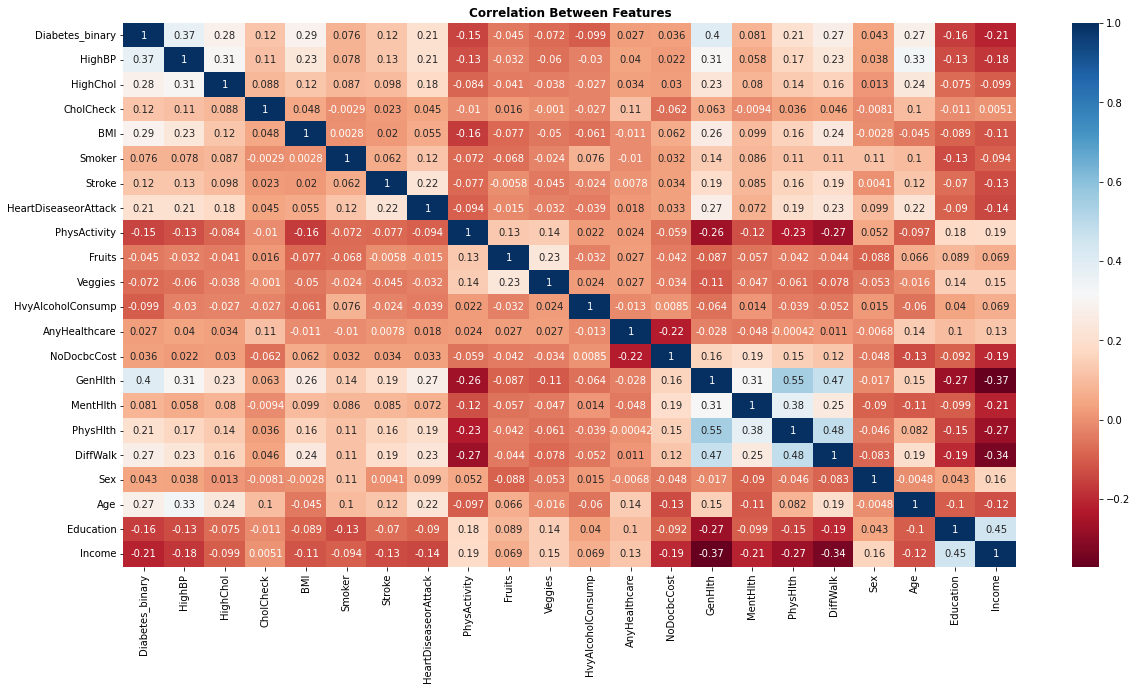

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), cmap="RdBu", annot=True)
plt.title("Correlation Between Features", fontweight = 'bold')
plt.show()

In [26]:
column_details = {}
for column in df.columns:
    if column != "Diabetes_binary":
        column_details[column] = df.groupby([column]).count()["Diabetes_binary"].shape[0]
print(column_details)

{'HighBP': 2, 'HighChol': 2, 'CholCheck': 2, 'BMI': 80, 'Smoker': 2, 'Stroke': 2, 'HeartDiseaseorAttack': 2, 'PhysActivity': 2, 'Fruits': 2, 'Veggies': 2, 'HvyAlcoholConsump': 2, 'AnyHealthcare': 2, 'NoDocbcCost': 2, 'GenHlth': 5, 'MentHlth': 31, 'PhysHlth': 31, 'DiffWalk': 2, 'Sex': 2, 'Age': 13, 'Education': 6, 'Income': 8}


**Note:** It Shows all the unique values in each column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

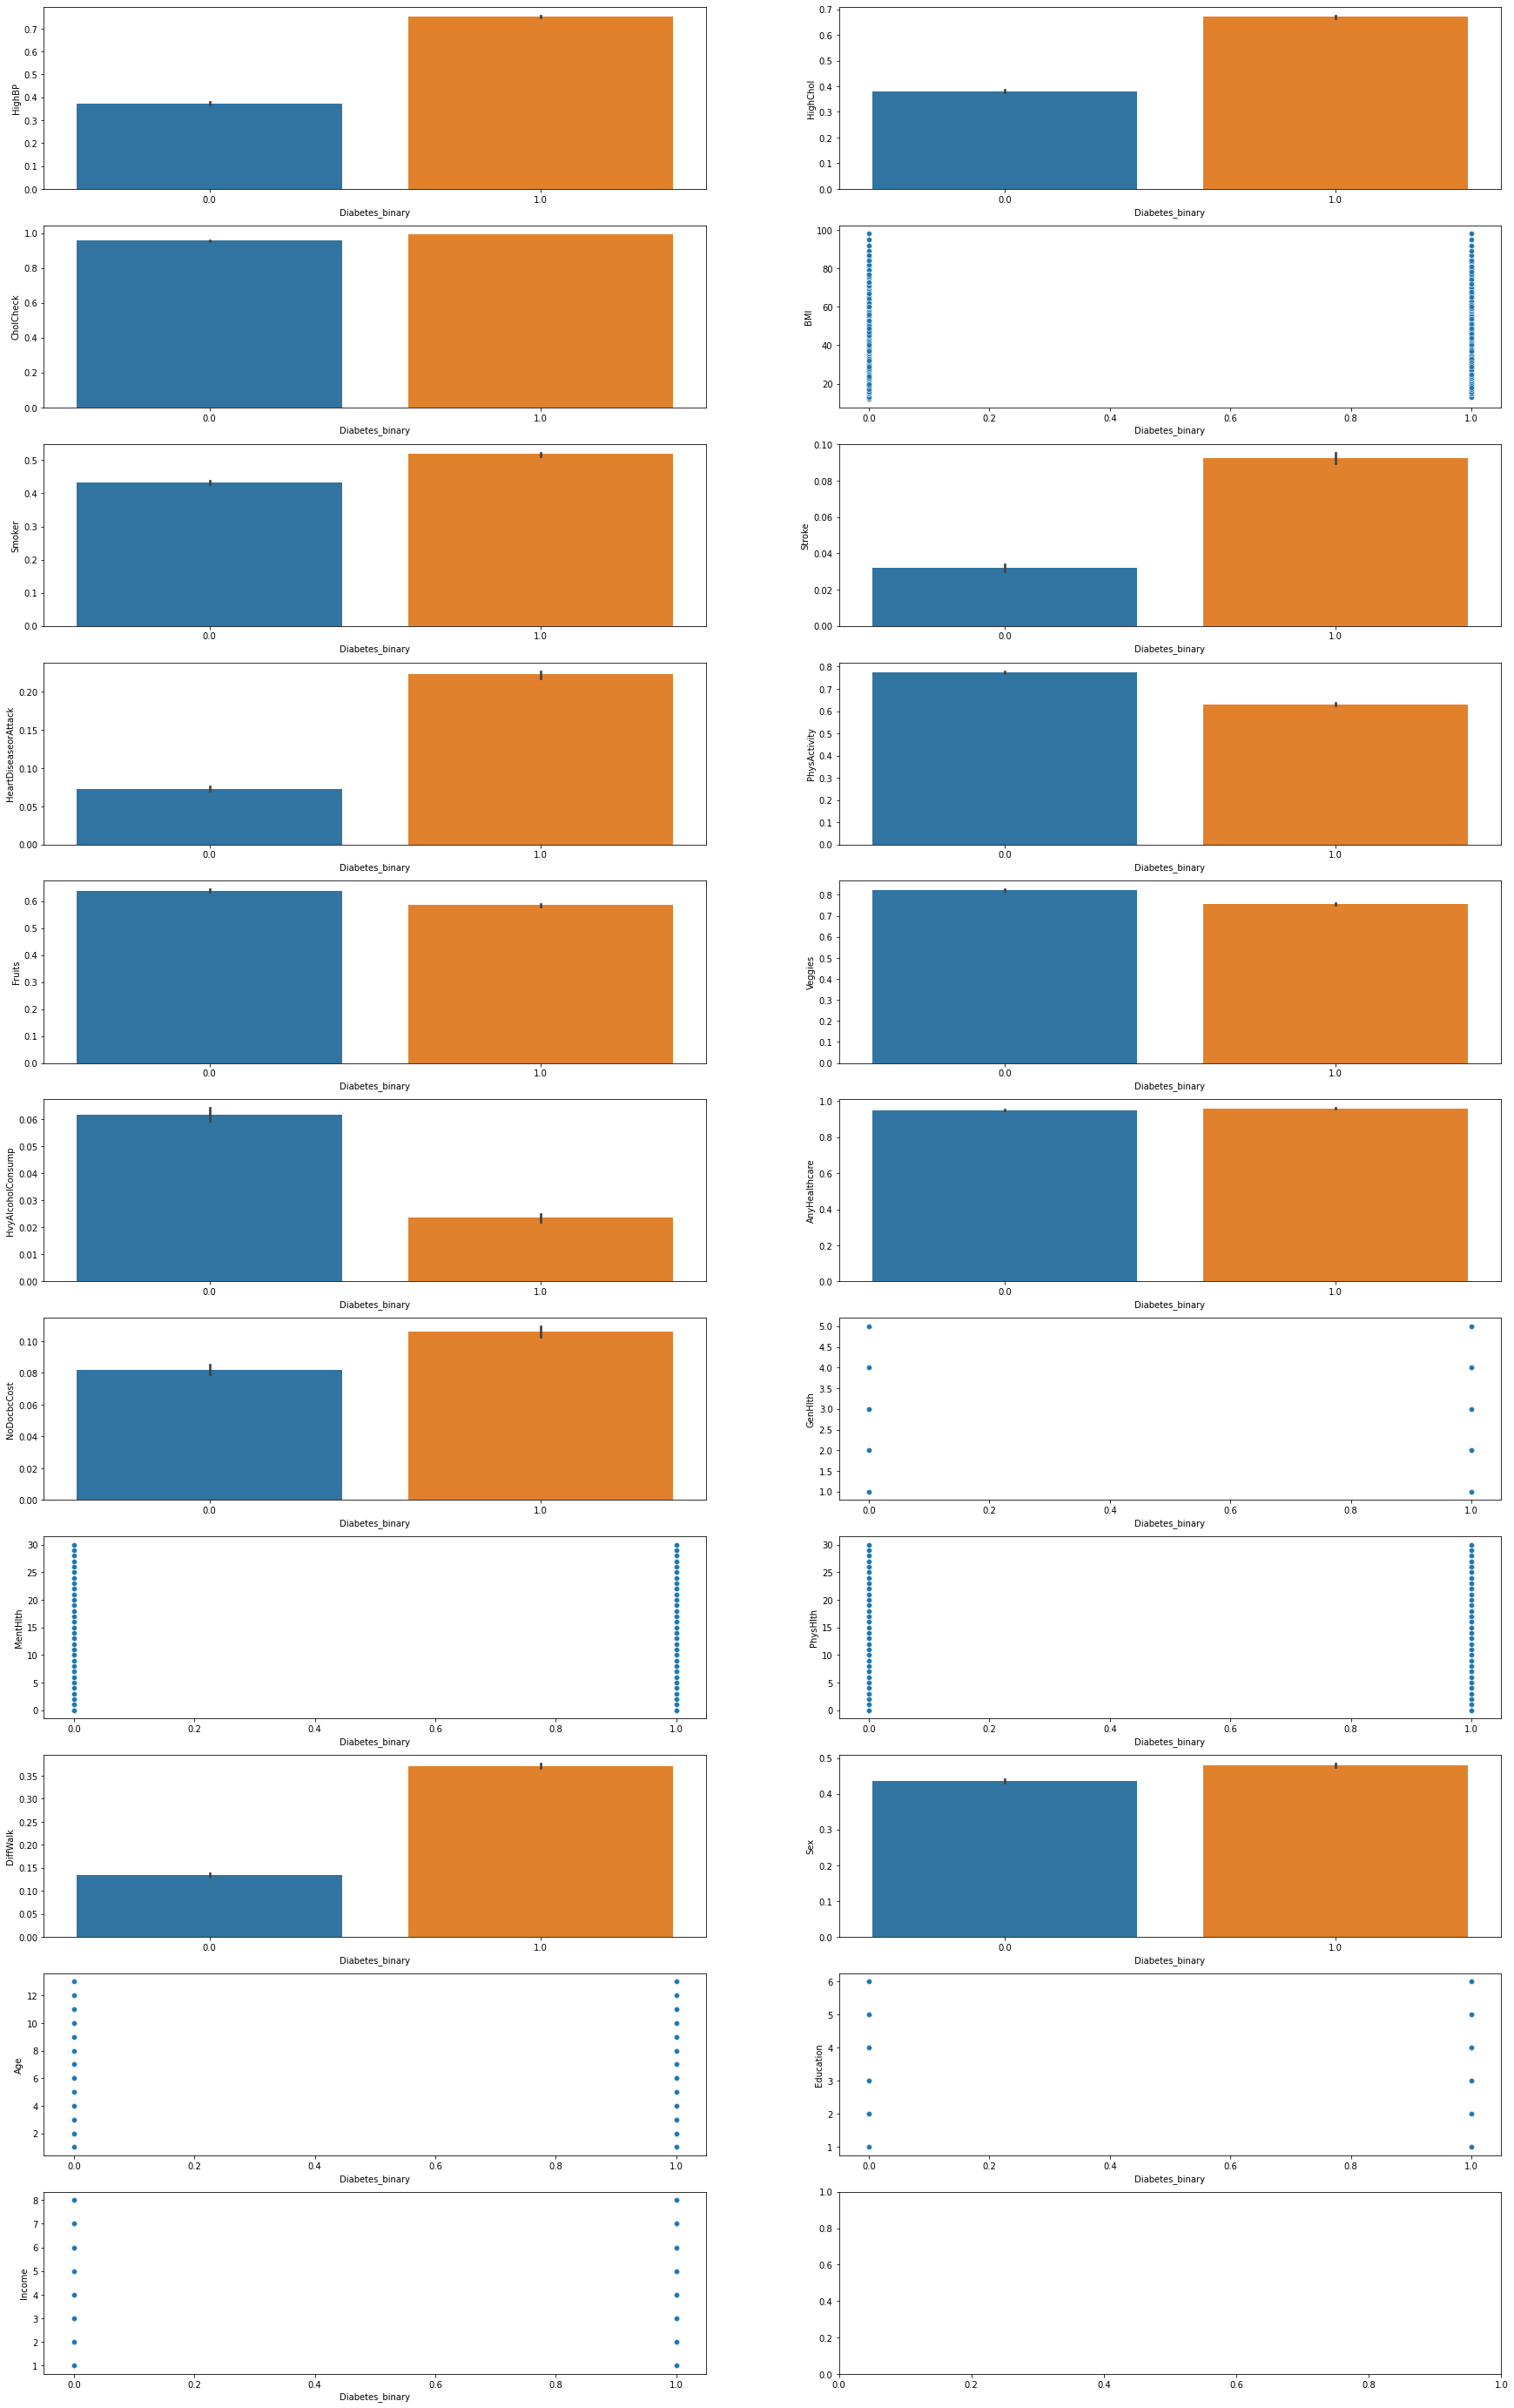

In [27]:
fig, ax = plt.subplots(11,2,figsize = (30,50))
i=0
for column in df.columns:
    if column != "Diabetes_binary":
        r = i // 2
        c = i % 2
        if column_details[column] > 2:
            sns.scatterplot(df["Diabetes_binary"], df[column], ax=ax[r][c])
        if column_details[column] <= 2 :
            sns.barplot(df["Diabetes_binary"], df[column], ax=ax[r][c])
        i=i+1
            
plt.show()

### Splitting Data

In [28]:
X = df_new.drop('Diabetes_binary', axis = 1)
Y = df_new['Diabetes_binary']
print(X.shape)
print(Y.shape)

(69057, 21)
(69057,)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print("Training X\t:  ", x_train.shape)
print("Training Y\t:  ", y_train.shape)
print("Testing X\t:  ", x_test.shape)
print("Testing Y\t:  ", y_test.shape)

Training X	:   (48339, 21)
Training Y	:   (48339,)
Testing X	:   (20718, 21)
Testing Y	:   (20718,)


## Modeling (with all features)

#### Random Forest

In [30]:
random_forest = RandomForestClassifier(random_state = 0, verbose = 1)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


0.7337098175499566

**Note:** Default Settings

In [31]:
random_forest = RandomForestClassifier(random_state = 0, verbose = 1, n_estimators=500)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished


0.7370402548508543

**Note:** Increased Models

In [32]:
random_forest = RandomForestClassifier(random_state = 0, verbose = 1, n_estimators=500, criterion="entropy")
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   30.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.9s finished


0.7380055989960421

**Note:** Changed criteria to Entropy

In [33]:
random_forest = RandomForestClassifier(random_state = 0, verbose = 1, n_estimators=500, criterion="entropy", max_features="log2")
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   29.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.0s finished


0.7380055989960421

**Note:** Changed Max Features to Log2 (no changes)

In [34]:
random_forest = RandomForestClassifier(random_state = 0, verbose = 1, n_estimators=500, criterion="entropy", max_features="log2", bootstrap=False)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.9s finished


0.7289313640312771

**Note:** Changed Bootstrap to False, Accuracy decreased

In [35]:
random_forest = RandomForestClassifier(random_state = 0, verbose = 1, n_estimators=1000, max_depth=10)
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   40.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


0.7541268462206777

**Note:** Increased models with max depth 10, Accuracy increased

##### Confusion Matrix and Classification Report

In [36]:
predictions_rf = random_forest.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


In [37]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, predictions_rf)
print(confusion_matrix_rf)

[[7164 2956]
 [2138 8460]]


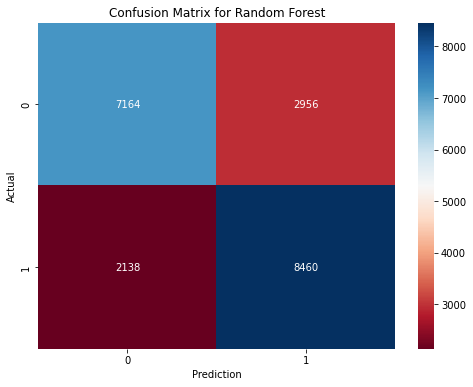

In [38]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_rf, annot = True, fmt = ".0f", cmap = 'RdBu')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [39]:
report_rf = metrics.classification_report(y_test, predictions_rf)
print(report_rf)

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10120
         1.0       0.74      0.80      0.77     10598

    accuracy                           0.75     20718
   macro avg       0.76      0.75      0.75     20718
weighted avg       0.76      0.75      0.75     20718



#### Decision Tree (Entropy)

In [40]:
desicion_tree = DecisionTreeClassifier(random_state = 0, criterion="entropy", splitter="random")
desicion_tree.fit(x_train, y_train)
desicion_tree.score(x_test, y_test)

0.6564340187276764

**Note:** Decision Tree Criteria Is Entropy and Changed splitter to random

##### Confusion Matrix and Classification Report

In [41]:
predictions_dt = desicion_tree.predict(x_test)

In [42]:
confusion_matrix_dt = metrics.confusion_matrix(y_test, predictions_dt)
print(confusion_matrix_dt)

[[6715 3405]
 [3713 6885]]


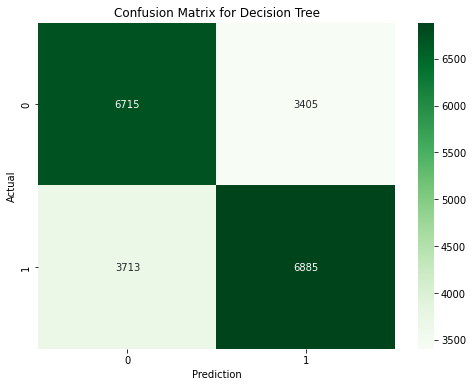

In [43]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_dt, annot = True, fmt = ".0f", cmap = 'Greens')
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [44]:
report_dt = metrics.classification_report(y_test, predictions_dt)
print(report_dt)

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     10120
         1.0       0.67      0.65      0.66     10598

    accuracy                           0.66     20718
   macro avg       0.66      0.66      0.66     20718
weighted avg       0.66      0.66      0.66     20718



#### Decision Tree (Gini)

In [45]:
desicion_Gtree = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, splitter="random")
desicion_Gtree.fit(x_train, y_train)
desicion_Gtree.score(x_test, y_test)

0.6976059465199344

**Note:** Decision Tree Criteria Is Gini and Changed splitter to random

##### Confusion Matrix and Classification Report

In [46]:
predictions_Gdt = desicion_Gtree.predict(x_test)

In [47]:
confusion_matrix_Gdt = metrics.confusion_matrix(y_test, predictions_Gdt)
print(confusion_matrix_Gdt)

[[7463 2657]
 [3608 6990]]


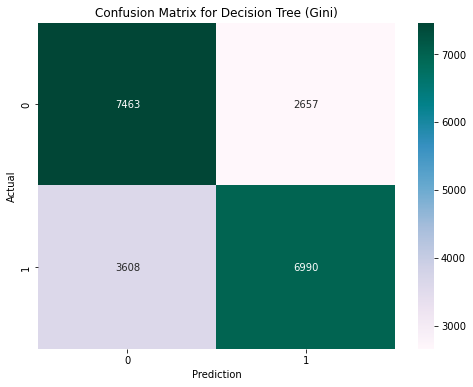

In [48]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_Gdt, annot = True, fmt = ".0f", cmap = 'PuBuGn')
plt.title("Confusion Matrix for Decision Tree (Gini)")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [49]:
report_Gdt = metrics.classification_report(y_test, predictions_Gdt)
print(report_Gdt)

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70     10120
         1.0       0.72      0.66      0.69     10598

    accuracy                           0.70     20718
   macro avg       0.70      0.70      0.70     20718
weighted avg       0.70      0.70      0.70     20718



#### Gradient Boosting

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 0)
gradient_boosting.fit(x_train, y_train)
gradient_boosting.score(x_test, y_test)

0.7545612510860121

**Note:** Default settings

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 0, n_estimators = 300)
gradient_boosting.fit(x_train, y_train)
gradient_boosting.score(x_test, y_test)

0.7561058017183125

**Note:** Increased models

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 0, n_estimators = 300, learning_rate = 0.15)
gradient_boosting.fit(x_train, y_train)
gradient_boosting.score(x_test, y_test)

0.7547060527077903

**Note:** Changed learning rate to 0.15

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 0, n_estimators = 300, criterion='mse')
gradient_boosting.fit(x_train, y_train)
gradient_boosting.score(x_test, y_test)

0.7561058017183125

**Note:** Changed criteria to Mean Squared Error

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 0, n_estimators = 300, max_depth = 10)
gradient_boosting.fit(x_train, y_train)
gradient_boosting.score(x_test, y_test)

0.7252630562795637

**Note:** Changed max depth to 10

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state = 0, n_estimators = 300, subsample = 0.8)
gradient_boosting.fit(x_train, y_train)
gradient_boosting.score(x_test, y_test)

0.7553335264021623

**Note:** Changed subsample to 80%

##### Confusion Matrix and Classification Report

In [ ]:
predictions_gb = gradient_boosting.predict(x_test)

In [ ]:
confusion_matrix_gb = metrics.confusion_matrix(y_test, predictions_gb)
print(confusion_matrix_gb)

[[7208 2912]
 [2141 8457]]


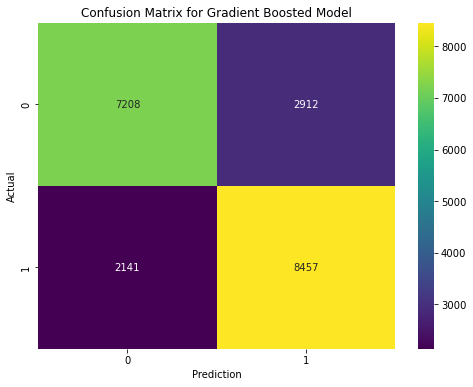

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_gb, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix for Gradient Boosted Model")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
report_gb = metrics.classification_report(y_test, predictions_gb)
print(report_gb)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     10120
           1       0.74      0.80      0.77     10598

    accuracy                           0.76     20718
   macro avg       0.76      0.76      0.76     20718
weighted avg       0.76      0.76      0.76     20718



#### Naive Bayes

In [55]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes.score(x_test, y_test)

0.7179747079833961

##### Confusion Matrix and Classification Report

In [56]:
predictions_nb = naive_bayes.predict(x_test)

In [57]:
confusion_matrix_nb = metrics.confusion_matrix(y_test, predictions_nb)
print(confusion_matrix_nb)

[[7318 2802]
 [3041 7557]]


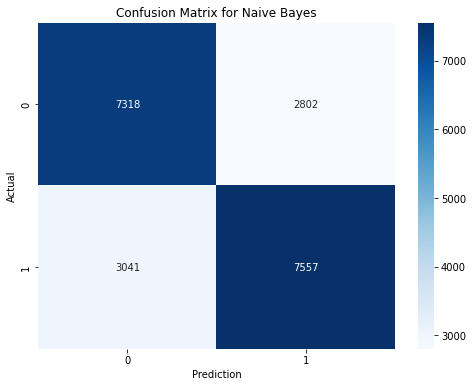

In [58]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_nb, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [59]:
report_nb = metrics.classification_report(y_test, predictions_nb)
print(report_nb)

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71     10120
         1.0       0.73      0.71      0.72     10598

    accuracy                           0.72     20718
   macro avg       0.72      0.72      0.72     20718
weighted avg       0.72      0.72      0.72     20718



#### Logistic Regression

In [60]:
# logistic_reg = LogisticRegression()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

logistic_reg = make_pipeline(StandardScaler(), LogisticRegression())
logistic_reg.fit(x_train, y_train)
logistic_reg.score(x_test, y_test)

0.7485761173858481

##### Confusion Matrix and Classification Report

In [61]:
predictions_lr = logistic_reg.predict(x_test)

In [62]:
confusion_matrix_lr = metrics.confusion_matrix(y_test, predictions_lr)
print(confusion_matrix_lr)

[[7331 2789]
 [2420 8178]]


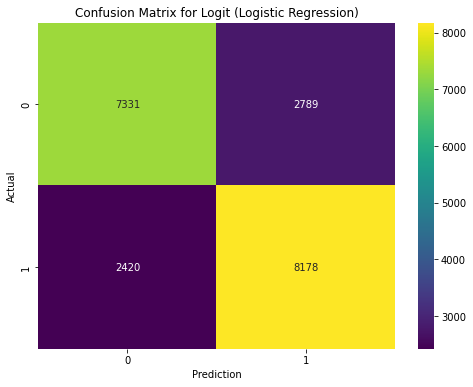

In [63]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_lr, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix for Logit (Logistic Regression)")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [64]:
report_lr = metrics.classification_report(y_test, predictions_lr)
print(report_lr)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     10120
         1.0       0.75      0.77      0.76     10598

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



## Evaluating Feature Importance Acc. to Each Algorithm

#### Random Forest

In [ ]:
train_columns = x_train.columns
features_rf = pd.Series(random_forest.feature_importances_, index = train_columns)
print(features_rf.sort_values(ascending = False))

GenHlth                 0.222461
HighBP                  0.192046
BMI                     0.133147
Age                     0.107900
HighChol                0.092223
DiffWalk                0.055364
Income                  0.033830
PhysHlth                0.033443
HeartDiseaseorAttack    0.030692
Education               0.017303
MentHlth                0.014594
CholCheck               0.010506
HvyAlcoholConsump       0.010083
Sex                     0.009215
PhysActivity            0.008859
Stroke                  0.006627
Smoker                  0.005165
Veggies                 0.004652
Fruits                  0.004566
NoDocbcCost             0.004016
AnyHealthcare           0.003306
dtype: float64


**Most important features are on top of the list**

#### Decision Tree

In [ ]:
train_columns = x_train.columns
features_dt = pd.Series(desicion_tree.feature_importances_, index = train_columns)
print(features_dt.sort_values(ascending = False))

BMI                     0.139279
HighBP                  0.101333
Age                     0.100460
Income                  0.092722
GenHlth                 0.079466
PhysHlth                0.069138
Education               0.066546
MentHlth                0.060881
Fruits                  0.038866
Smoker                  0.038037
Veggies                 0.032454
PhysActivity            0.030395
Sex                     0.029653
DiffWalk                0.022582
HighChol                0.021861
NoDocbcCost             0.018638
HeartDiseaseorAttack    0.016553
Stroke                  0.014107
AnyHealthcare           0.010738
HvyAlcoholConsump       0.009566
CholCheck               0.006728
dtype: float64


#### Gradient Boosting

In [ ]:
train_columns = x_train.columns
features_gb = pd.Series(gradient_boosting.feature_importances_, index = train_columns)
print(features_gb.sort_values(ascending = False))

HighBP                  0.321856
GenHlth                 0.284878
BMI                     0.120716
Age                     0.110606
HighChol                0.066013
HeartDiseaseorAttack    0.016093
Income                  0.015548
DiffWalk                0.012535
CholCheck               0.011101
HvyAlcoholConsump       0.010891
Sex                     0.009753
Education               0.005578
MentHlth                0.004120
PhysHlth                0.003941
Stroke                  0.002287
Smoker                  0.000978
Fruits                  0.000887
PhysActivity            0.000669
NoDocbcCost             0.000589
AnyHealthcare           0.000541
Veggies                 0.000423
dtype: float64


#### Naive Bayes

    **Note: Since Naive Bayes don't have an attribute 'feature_importances_', we can't calculate the importance of each feature in this case**

*Let's visualize these to get a better understanding*

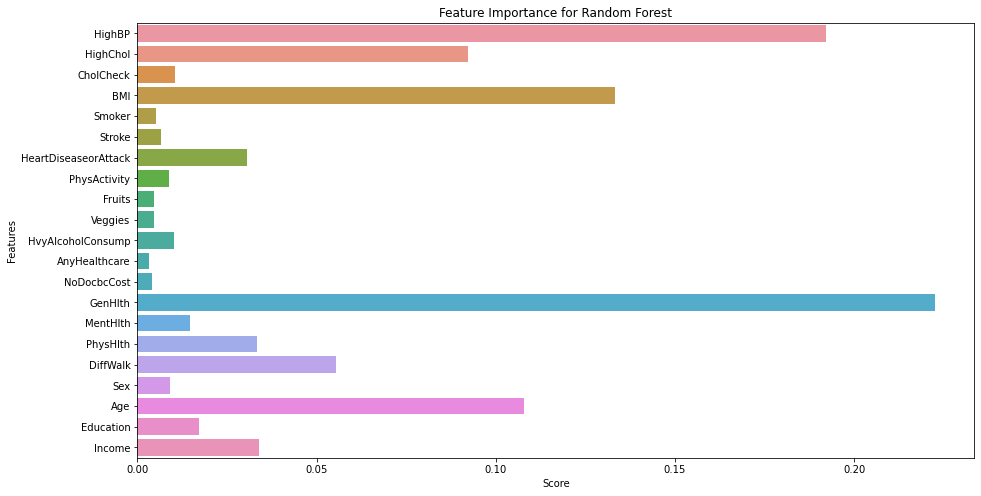

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = features_rf, y = features_rf.index)
plt.title("Feature Importance for Random Forest")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

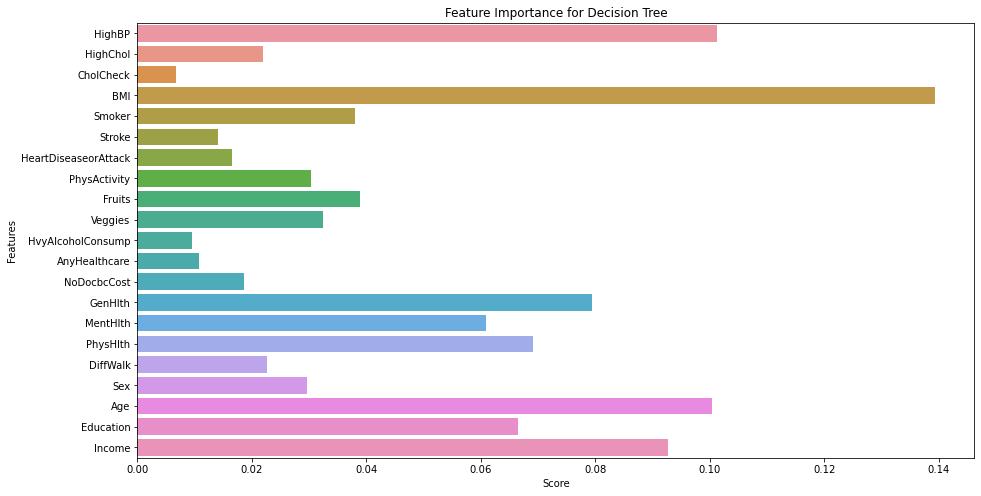

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = features_dt, y = features_dt.index)
plt.title("Feature Importance for Decision Tree")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

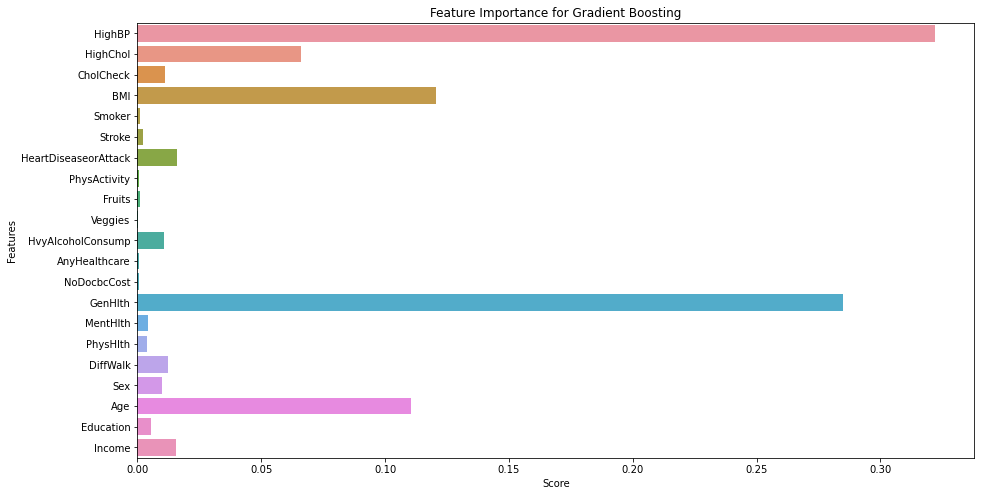

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = features_gb, y = features_gb.index)
plt.title("Feature Importance for Gradient Boosting")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

On the basis of observations, we have concluded that the following features seems to have more importance than others; Therefore, we are selecting these features and training our models again with these features only.<br><br>
**'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'PhysHlth', 'HeartDiseaseorAttack', 'GenHlth', 'Age'**

In [ ]:
X_new = df_new.drop('Diabetes_binary', axis = 1)
X_new = X_new[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'PhysHlth', 'HeartDiseaseorAttack', 'GenHlth', 'Age']]
Y_new = df_new['Diabetes_binary']
print(X_new.shape)
print(Y_new.shape)

(69057, 10)
(69057,)


In [ ]:
X_new.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysHlth,HeartDiseaseorAttack,GenHlth,Age
0,1.0,0.0,1.0,26.0,0.0,0.0,30.0,0.0,3.0,4.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,3.0,12.0
2,0.0,0.0,1.0,26.0,0.0,0.0,10.0,0.0,1.0,13.0
3,1.0,1.0,1.0,28.0,1.0,0.0,3.0,0.0,3.0,11.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,0.0,2.0,8.0


In [ ]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, test_size = 0.3, random_state = 42)
print(x_train_new.shape)
print(x_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(48339, 10)
(20718, 10)
(48339,)
(20718,)


Now, since we have an updated dataset, let's train the models again and observe their accuracy

## Modeling with Feature Selection

#### Random Forest

Previously, the accuracy achieved by this model was 75.41%

In [ ]:
random_forest_new = RandomForestClassifier(random_state = 0, verbose = 1, n_estimators=1000, max_depth=10)
random_forest_new.fit(x_train_new, y_train_new)
random_forest_new.score(x_test_new, y_test_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


0.7499758663963703

**Note:** Seems like accuracy decreased a bit in this case

#### Decision Tree

Previously, the accuracy achieved by this model was 65.64%

In [ ]:
desicion_tree_new = DecisionTreeClassifier(random_state = 0, criterion="entropy", splitter="random")
desicion_tree_new.fit(x_train_new, y_train_new)
desicion_tree_new.score(x_test_new, y_test_new)

0.6799401486629983

**Note:** Seems like accuracy increased in this case

#### Gradient Boosting

Previously, the accuracy achieved by this model was 75.61%

In [ ]:
gradient_boosting_new = GradientBoostingClassifier(random_state = 0, n_estimators = 300)
gradient_boosting_new.fit(x_train_new, y_train_new)
gradient_boosting_new.score(x_test_new, y_test_new)

0.7512790809923737

**Note:** Seems like accuracy decreased a bit in this case

#### Naive Bayes

Previously, the accuracy achieved by this model was 71.8%

In [ ]:
naive_bayes_new = GaussianNB()
naive_bayes_new.fit(x_train_new, y_train_new)
naive_bayes_new.score(x_test_new, y_test_new)

0.7306689834926151

**Note:** Seems like accuracy increased in this case

## ROC Curve:

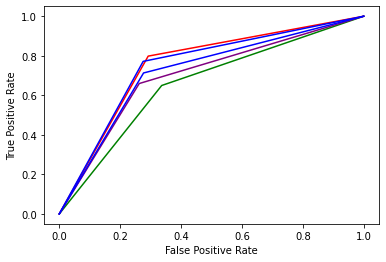

In [67]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, predictions_rf)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, predictions_dt)
fpr_Gdt, tpr_Gdt, _ = metrics.roc_curve(y_test, predictions_Gdt)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, predictions_nb)
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, predictions_lr)

plt.plot(fpr_rf,tpr_rf,color="red")
plt.plot(fpr_dt,tpr_dt,color="green")
plt.plot(fpr_Gdt,tpr_Gdt,color="purple")
plt.plot(fpr_nb,tpr_nb,color="blue")
plt.plot(fpr_lr,tpr_lr,color="blue")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()